In [1]:
pip install dask[dataframe]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
cleaned_goalkeeeprs_df = pd.read_csv('goalkeepers_rating.csv')
cleaned_midfielders_df = pd.read_csv('midfielders_rating.csv')
cleaned_forwarders_df = pd.read_csv('forwarders_rating.csv')
cleaned_defenders_df = pd.read_csv('defenders_rating.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(cleaned_midfielders_df.head())
print(cleaned_midfielders_df.tail())

         date pos_role  original_rating  goals  assists  shots_ontarget  \
0  2016-06-10      DMC             6.58      0        0               0   
1  2016-06-10       MC             7.06      0        0               1   
2  2016-06-10       MC             7.67      0        1               0   
3  2016-06-10      AMC             7.26      0        0               0   
4  2016-06-10      AML             6.74      1        0               1   

   shots_offtarget  shotsblocked  chances2score  drib_success  ...  \
0                1             0              1             2  ...   
1                0             0              0             2  ...   
2                0             0              0             2  ...   
3                1             1              0             1  ...   
4                1             0              2             0  ...   

   missed_penalties  owngoals  degree_centrality  betweenness_centrality  \
0                 0         0           1.571429    

In [4]:
import pandas as pd

df = cleaned_midfielders_df

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:
goals_ag_otb
goals_ag_itb
saves_itb
saved_pen


In [5]:
#we dropped the columns, that has single value in the dataset and it is known that all goal leepers here played for 90 minutes as well

columns_to_drop = ['goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saved_pen']

# Dropping the columns and retaining the name goalkeepers_df
cleaned_midfielders_df = cleaned_midfielders_df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataframe to verify
cleaned_midfielders_df.head()

,date,pos_role,original_rating,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,...,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
0,2016-06-10,DMC,6.58,0,0,0,1,0,1,2,...,0,0,1.571429,0.333284,0.710084,0.347826,0.675075,0.000000,90,90
1,2016-06-10,MC,7.06,0,0,1,0,0,0,2,...,0,0,1.642857,0.307731,0.754464,0.520548,1.315471,0.000000,90,90
2,2016-06-10,MC,7.67,0,1,0,0,0,0,2,...,0,0,1.642857,0.294035,0.754464,0.589041,1.409433,0.032258,90,90
3,2016-06-10,AMC,7.26,0,0,0,1,1,0,1,...,0,0,1.000000,0.121665,0.635338,0.275362,1.457930,0.000000,72,90
4,2016-06-10,AML,6.74,1,0,1,1,0,2,0,...,0,0,1.428571,0.385343,0.710084,0.260870,0.812281,0.000000,90,90


In [6]:
cleaned_midfielders_df.shape

(7206, 49)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [8]:
cleaned_midfielders_df.head()

,date,pos_role,original_rating,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,...,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
0,2016-06-10,DMC,6.58,0,0,0,1,0,1,2,...,0,0,1.571429,0.333284,0.710084,0.347826,0.675075,0.000000,90,90
1,2016-06-10,MC,7.06,0,0,1,0,0,0,2,...,0,0,1.642857,0.307731,0.754464,0.520548,1.315471,0.000000,90,90
2,2016-06-10,MC,7.67,0,1,0,0,0,0,2,...,0,0,1.642857,0.294035,0.754464,0.589041,1.409433,0.032258,90,90
3,2016-06-10,AMC,7.26,0,0,0,1,1,0,1,...,0,0,1.000000,0.121665,0.635338,0.275362,1.457930,0.000000,72,90
4,2016-06-10,AML,6.74,1,0,1,1,0,2,0,...,0,0,1.428571,0.385343,0.710084,0.260870,0.812281,0.000000,90,90


In [9]:
cleaned_midfielders_df.describe()

,original_rating,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,...,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
count,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,...,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000
mean,6.906438,0.105190,0.092562,0.358451,0.753122,0.317097,0.710103,0.750208,0.496531,0.363586,...,0.002914,0.000833,1.289509,0.200361,0.707691,0.368448,0.999819,0.011898,83.228837,90.324729
std,0.711819,0.331184,0.312422,0.641295,0.967035,0.600767,0.967724,1.108066,0.824622,0.698308,...,0.053909,0.028845,0.263640,0.083013,0.085179,0.119672,0.603940,0.026842,12.781219,3.104476
min,4.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.071429,0.000000,0.362963,0.013889,0.000000,0.000000,10.000000,90.000000
25%,6.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.133333,0.138896,0.653333,0.285714,0.568484,0.000000,79.000000,90.000000
50%,6.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.307692,0.193650,0.710084,0.365854,0.949518,0.000000,90.000000,90.000000
75%,7.310000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.466667,0.255100,0.768627,0.447917,1.373111,0.000000,90.000000,90.000000
max,10.000000,3.000000,3.000000,5.000000,7.000000,4.000000,6.000000,10.000000,7.000000,6.000000,...,1.000000,1.000000,1.928571,0.525179,0.933333,0.810811,5.199492,0.333333,120.000000,120.000000


In [10]:
cleaned_midfielders_df.original_rating.value_counts()

original_rating
6.50    60
6.53    58
6.67    57
6.68    54
6.54    53
        ..
9.25     1
9.51     1
9.01     1
9.48     1
9.77     1
Name: count, Length: 432, dtype: int64

In [11]:
# lets move towards splitting the data.

# get the locations
y = cleaned_midfielders_df['original_rating']
X = cleaned_midfielders_df.drop(columns=['original_rating'], axis=1)

In [12]:
X.head()

,date,pos_role,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,...,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
0,2016-06-10,DMC,0,0,0,1,0,1,2,0,...,0,0,1.571429,0.333284,0.710084,0.347826,0.675075,0.000000,90,90
1,2016-06-10,MC,0,0,1,0,0,0,2,1,...,0,0,1.642857,0.307731,0.754464,0.520548,1.315471,0.000000,90,90
2,2016-06-10,MC,0,1,0,0,0,0,2,1,...,0,0,1.642857,0.294035,0.754464,0.589041,1.409433,0.032258,90,90
3,2016-06-10,AMC,0,0,0,1,1,0,1,1,...,0,0,1.000000,0.121665,0.635338,0.275362,1.457930,0.000000,72,90
4,2016-06-10,AML,1,0,1,1,0,2,0,0,...,0,0,1.428571,0.385343,0.710084,0.260870,0.812281,0.000000,90,90


In [13]:
y.head()

0    6.58
1    7.06
2    7.67
3    7.26
4    6.74
Name: original_rating, dtype: float64

In [14]:
# Create DataFrame
# Convert 'date' column to datetime with error handling
X['date'] = pd.to_datetime(X['date'], errors='coerce')

# Check for any NaT values
if X['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day

# Drop the original 'date' column
X = X.drop(columns=['date'])

# Display the DataFrame
print(X.head())

  pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0      DMC      0        0               0                1             0   
1       MC      0        0               1                0             0   
2       MC      0        1               0                0             0   
3      AMC      0        0               0                1             1   
4      AML      1        0               1                1             0   

   chances2score  drib_success  drib_unsuccess  keypasses  ...  \
0              1             2               0          0  ...   
1              0             2               1          0  ...   
2              0             2               1          0  ...   
3              0             1               1          3  ...   
4              2             0               0          0  ...   

   betweenness_centrality  closeness_centrality  flow_centrality  \
0                0.333284              0.710084         0.347826   
1   

In [15]:
X.columns

Index(['pos_role', 'goals', 'assists', 'shots_ontarget', 'shots_offtarget',
       'shotsblocked', 'chances2score', 'drib_success', 'drib_unsuccess',
       'keypasses', 'touches', 'passes_acc', 'passes_inacc', 'crosses_acc',
       'crosses_inacc', 'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l',
       'aerials_w', 'aerials_l', 'poss_lost', 'fouls', 'wasfouled',
       'clearances', 'stop_shots', 'interceptions', 'tackles', 'dribbled_past',
       'tballs_acc', 'tballs_inacc', 'ycards', 'rcards', 'dangmistakes',
       'countattack', 'offsides', 'saves_otb', 'missed_penalties', 'owngoals',
       'degree_centrality', 'betweenness_centrality', 'closeness_centrality',
       'flow_centrality', 'flow_success', 'betweenness2goals', 'minutesPlayed',
       'game_duration', 'year', 'month', 'day'],
      dtype='object')

In [16]:
X.dtypes

pos_role                   object
goals                       int64
assists                     int64
shots_ontarget              int64
shots_offtarget             int64
shotsblocked                int64
chances2score               int64
drib_success                int64
drib_unsuccess              int64
keypasses                   int64
touches                     int64
passes_acc                  int64
passes_inacc                int64
crosses_acc                 int64
crosses_inacc               int64
lballs_acc                  int64
lballs_inacc                int64
grduels_w                   int64
grduels_l                   int64
aerials_w                   int64
aerials_l                   int64
poss_lost                   int64
fouls                       int64
wasfouled                   int64
clearances                  int64
stop_shots                  int64
interceptions               int64
tackles                     int64
dribbled_past               int64
tballs_acc    

In [17]:
X.pos_role.value_counts()

pos_role
MC     2592
DMC    1073
AMC    1039
ML      547
MR      538
AML     415
AMR     412
DMR     295
DML     295
Name: count, dtype: int64

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("MinMaxScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
X= pd.DataFrame(X, columns=all_col_names)
print(X.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             0.0              1.0           0.0   
1    0.0      0.0             0.0              0.0           0.0   
2    0.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      1.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses   touches  ...  \
0            0.0           0.0             0.0        0.0  0.000000  ...   
1            0.0           1.0             0.0        0.0  0.000000  ...   
2            0.0           1.0             0.0        0.0  0.000000  ...   
3            0.0           0.0             0.0        0.0  0.000000  ...   
4            0.0           0.0             0.0        0.0  0.333333  ...   

        day  pos_role_AMC  pos_role_AML  pos_role_AMR  pos_role_DMC  \
0  0.634610      0.608589      0.419034      0.129835      0.00

In [19]:
X.shape

(7206, 58)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 4323
Validation set size: 1441
Test set size: 1442


In [21]:
X_train.head()

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,...,day,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMC,pos_role_DML,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR
3986,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.369389,0.711230,0.548128,0.249671,0.000000,0.727273,0.0,1.0,0.000000,0.400000
1541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.589228,0.795455,0.594683,0.165000,0.000000,0.727273,0.0,0.5,0.727273,0.966667
6255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.395650,0.477541,0.438873,0.065431,0.000000,0.727273,0.0,1.0,0.363636,0.133333
3995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.465020,0.569378,0.406076,0.086833,0.000000,0.727273,0.0,1.0,0.000000,0.400000
4984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.486571,0.795455,0.360370,0.074773,0.136364,0.727273,0.0,1.0,0.181818,0.066667


In [22]:
##Model evaluation

## Modelling

Why Use a Random Seed?
Reproducibility: Ensures that running the code multiple times yields the same result, which is crucial for debugging, sharing results, and scientific research.
Consistency: Helps to consistently compare models, algorithms, or data transformations under the same conditions.

Training Metrics:
                          Model      MSE      MAE       R2     RMSE        R
0            XGBoost Regression  0.01863  0.10052  0.96279  0.13650  0.98256
1           AdaBoost Regression  0.21913  0.37591  0.56237  0.46811  0.75587
2             Linear Regression  0.16401  0.31687  0.67245  0.40499  0.82003
3                KNN Regression  0.24117  0.37567  0.51836  0.49109  0.77113
4      Decision Tree Regression  0.00000  0.00000  1.00000  0.00000  1.00000
5      Random Forest Regression  0.02793  0.12856  0.94422  0.16712  0.97852
6  Gradient Boosting Regression  0.14830  0.30163  0.70382  0.38510  0.84241
7                SVR Regression  0.12960  0.26866  0.74117  0.36001  0.86286
8     Neural Network Regression  0.09234  0.23474  0.81559  0.30387  0.90341

Validation Metrics:
                          Model      MSE      MAE       R2     RMSE        R
0            XGBoost Regression  0.19349  0.34123  0.62369  0.43987  0.79014
1           AdaBoost Regression  0.22

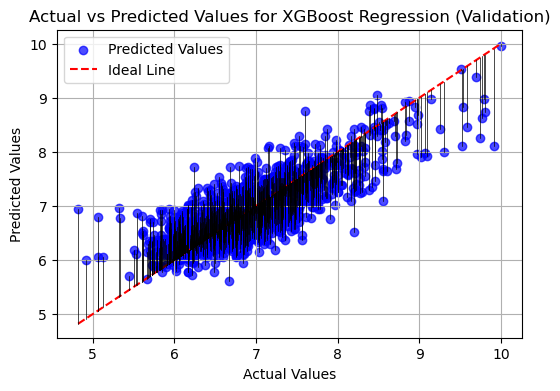

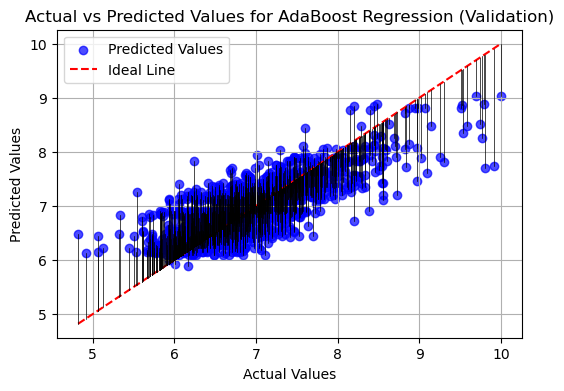

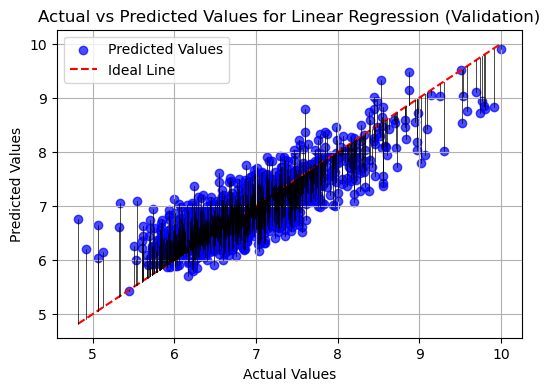

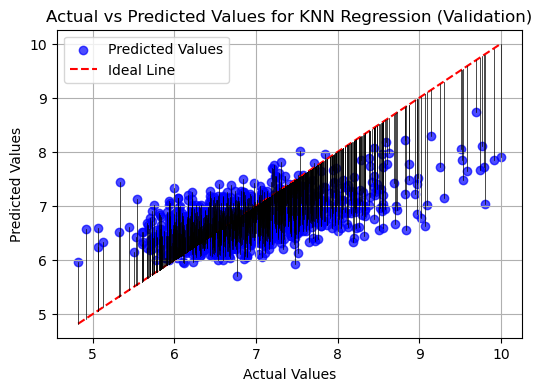

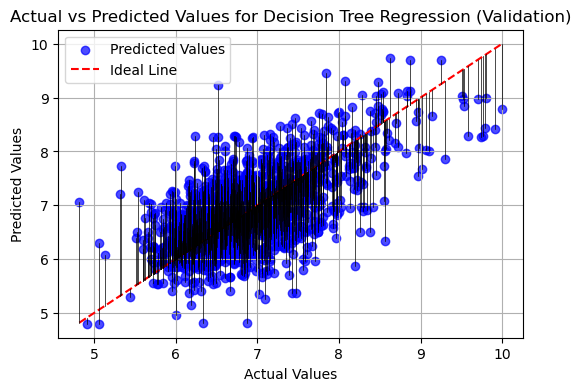

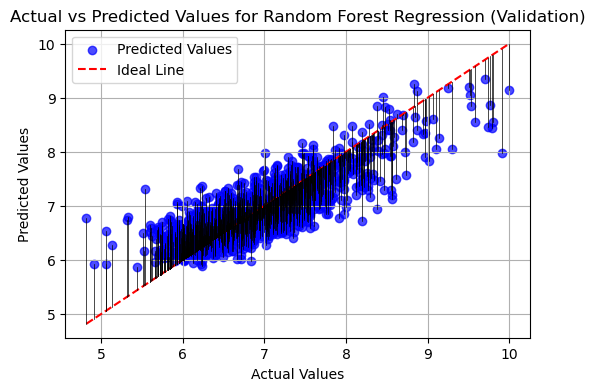

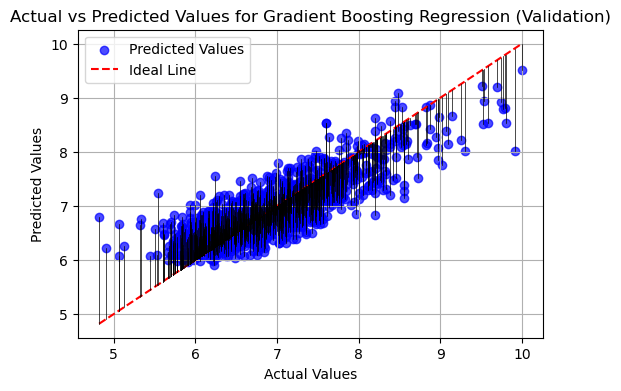

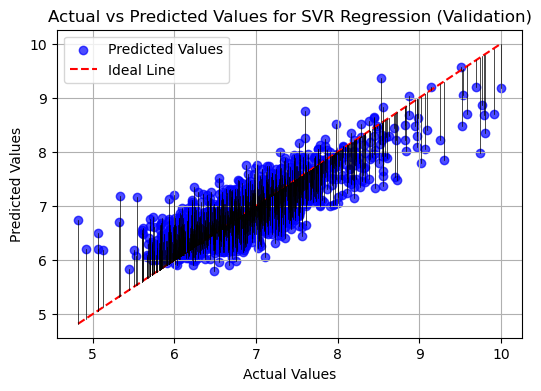

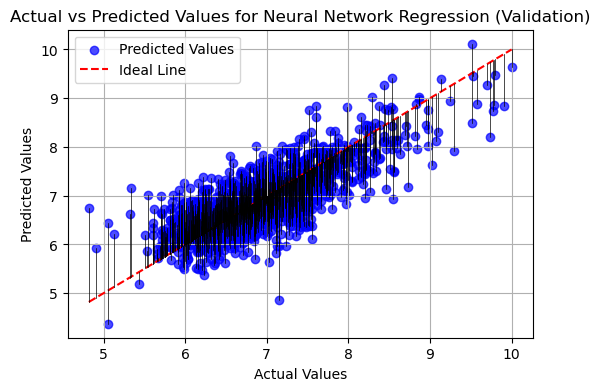

In [23]:
#train all features with base model, fitiing on train data and evaluation on val data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
train_metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE', 'R'])
val_metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE', 'R'])

# Train, predict and evaluate models
train_metrics_list = []
val_metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    
    # Predictions on training data
    y_train_pred = model.predict(X_train)
    
    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r, _ = pearsonr(y_train, y_train_pred)
    
    train_metrics_list.append({'Model': name, 'MSE': train_mse, 'MAE': train_mae, 'R2': train_r2, 'RMSE': train_rmse, 'R': train_r})
    
    # Predictions on validation data
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics for validation data
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r, _ = pearsonr(y_val, y_val_pred)
    
    val_metrics_list.append({'Model': name, 'MSE': val_mse, 'MAE': val_mae, 'R2': val_r2, 'RMSE': val_rmse, 'R': val_r})

# Convert list of dictionaries to DataFrames
train_metrics_df = pd.DataFrame(train_metrics_list)
val_metrics_df = pd.DataFrame(val_metrics_list)

# Format numerical columns to 5 decimal places
train_metrics_df[['MSE', 'MAE', 'R2', 'RMSE', 'R']] = train_metrics_df[['MSE', 'MAE', 'R2', 'RMSE', 'R']].applymap(lambda x: f"{x:.5f}")
val_metrics_df[['MSE', 'MAE', 'R2', 'RMSE', 'R']] = val_metrics_df[['MSE', 'MAE', 'R2', 'RMSE', 'R']].applymap(lambda x: f"{x:.5f}")

# Display training metrics
print("Training Metrics:")
print(train_metrics_df)

# Display validation metrics
print("\nValidation Metrics:")
print(val_metrics_df)

# Visualization of Actual vs Predicted for Validation Data
for model, name in models:
    y_val_pred = model.predict(X_val)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_val, y_val_pred, alpha=0.7, color='blue', label='Predicted Values')
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Line')
    
    # Adding error bars
    for actual, predicted in zip(y_val, y_val_pred):
        plt.plot([actual, actual], [actual, predicted], 'k-', lw=0.5)
    
    plt.title(f'Actual vs Predicted Values for {name} (Validation)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


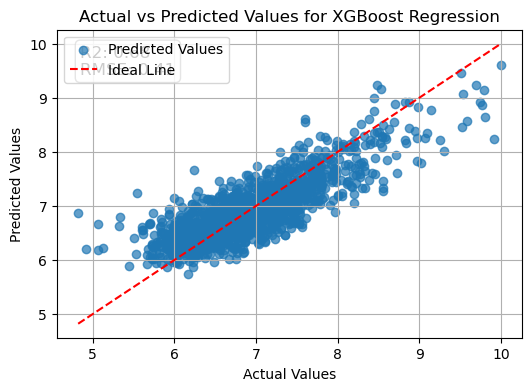

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.2, 'n_estimators': 200}


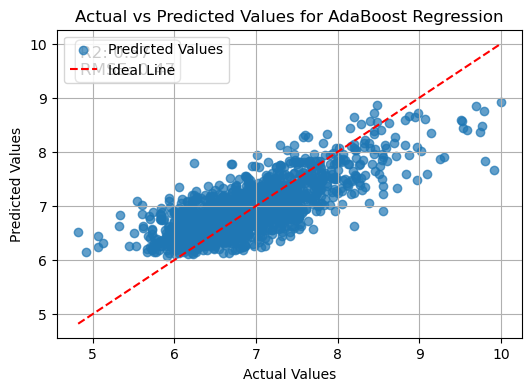

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}


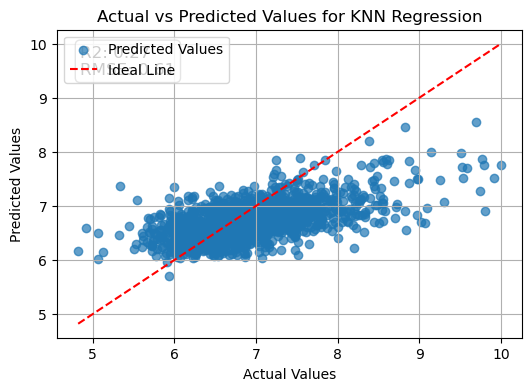

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 20}


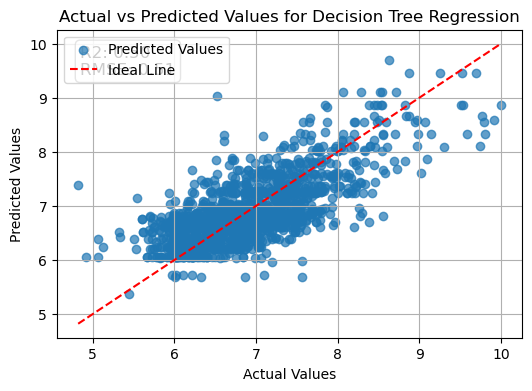

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


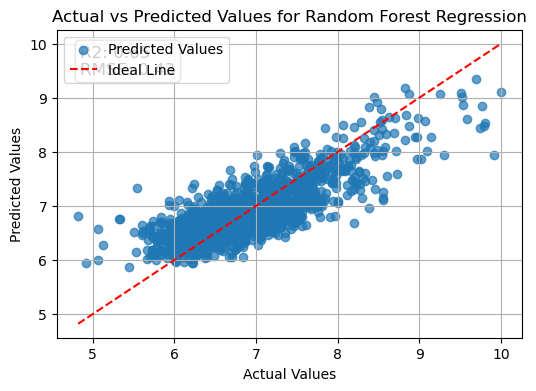

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


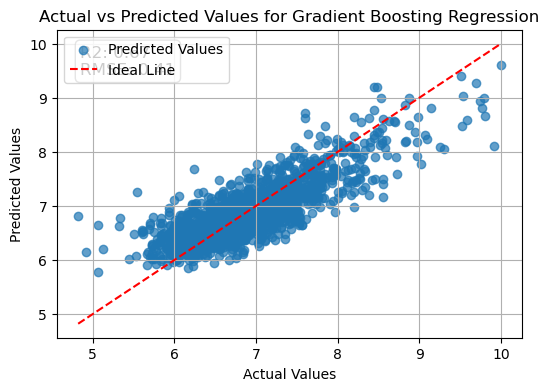

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


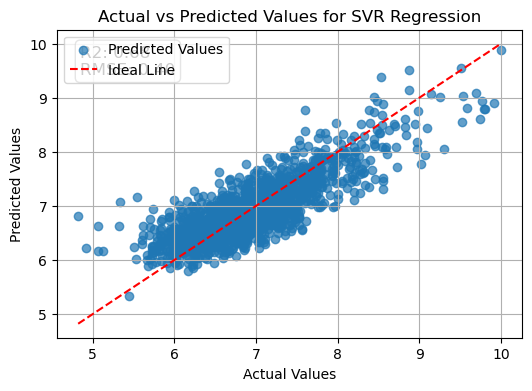

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


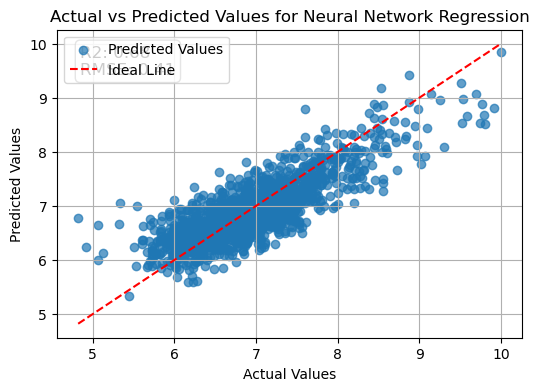

                          Model       MSE       MAE      RMSE        R2  \
0            XGBoost Regression  0.166985  0.316302  0.408639  0.675232   
1           AdaBoost Regression  0.219923  0.365220  0.468960  0.572275   
2                KNN Regression  0.376423  0.465273  0.613534  0.267899   
3      Decision Tree Regression  0.256289  0.390718  0.506250  0.501547   
4      Random Forest Regression  0.181857  0.329889  0.426447  0.646308   
5  Gradient Boosting Regression  0.168293  0.316975  0.410236  0.672689   
6                SVR Regression  0.162108  0.313821  0.402627  0.684718   
7     Neural Network Regression  0.164625  0.314867  0.405740  0.679823   

          R  
0  0.822726  
1  0.760470  
2  0.591412  
3  0.719557  
4  0.806329  
5  0.821080  
6  0.827616  
7  0.824822  


In [24]:
#tunning with parameters on val with all features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2','R'])

# Assume X_train, X_val, y_train, y_val are already defined
# X_train, X_val, y_train, y_val = ...

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2,'R':r})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(6, 4))
    plt.scatter(y_val, y_pred, alpha=0.7, label='Predicted Values')
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Line')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.legend()
    
    # Add R2 and RMSE to the plot
    plt.text(0.05, 0.95, f'R2: {r2:.2f}\nRMSE: {rmse:.2f}', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5, facecolor='white'))
    
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...


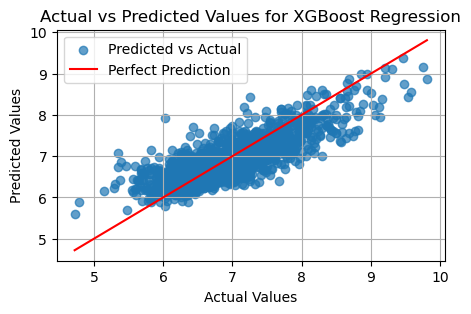

Actual vs Predicted values for XGBoost Regression:
       Actual  Predicted
3091    7.39   7.502592
1535    6.58   6.374898
6338    7.54   7.825042
177     6.42   6.992888
230     7.33   7.273004
...      ...        ...
5542    7.28   6.860797
4950    7.26   6.517076
1886    7.60   7.424689
911     7.50   6.757625
6525    6.16   6.751833

[1442 rows x 2 columns]
Training AdaBoost Regression...


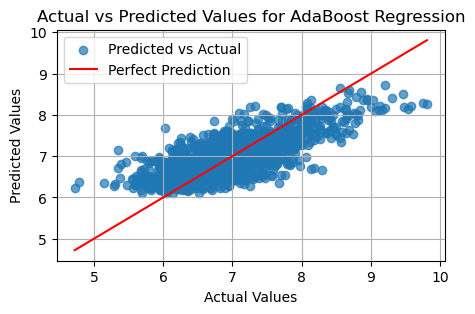

Actual vs Predicted values for AdaBoost Regression:
       Actual  Predicted
3091    7.39   7.536628
1535    6.58   6.476489
6338    7.54   7.843895
177     6.42   6.520545
230     7.33   7.355091
...      ...        ...
5542    7.28   6.895208
4950    7.26   6.556697
1886    7.60   7.211163
911     7.50   6.889659
6525    6.16   6.723710

[1442 rows x 2 columns]
Training KNN Regression...


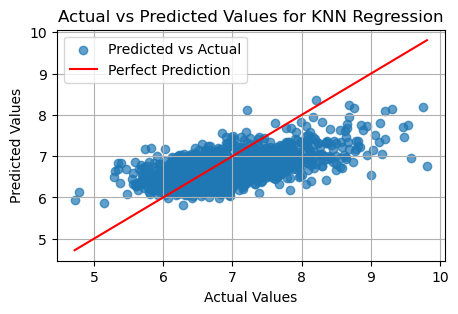

Actual vs Predicted values for KNN Regression:
       Actual  Predicted
3091    7.39   7.454642
1535    6.58   6.072361
6338    7.54   6.681803
177     6.42   7.038168
230     7.33   7.032764
...      ...        ...
5542    7.28   7.112077
4950    7.26   6.852381
1886    7.60   6.463705
911     7.50   6.821808
6525    6.16   6.818326

[1442 rows x 2 columns]
Training Decision Tree Regression...


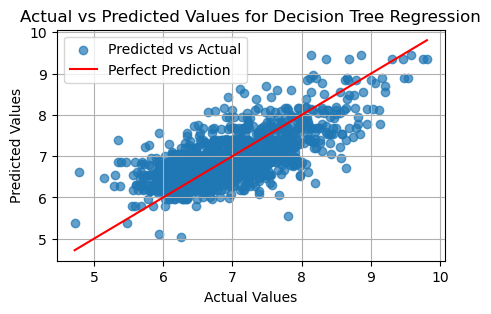

Actual vs Predicted values for Decision Tree Regression:
       Actual  Predicted
3091    7.39   7.397333
1535    6.58   6.562800
6338    7.54   7.943846
177     6.42   6.821600
230     7.33   6.965263
...      ...        ...
5542    7.28   6.531220
4950    7.26   6.616299
1886    7.60   7.675714
911     7.50   6.860934
6525    6.16   6.616299

[1442 rows x 2 columns]
Training Random Forest Regression...


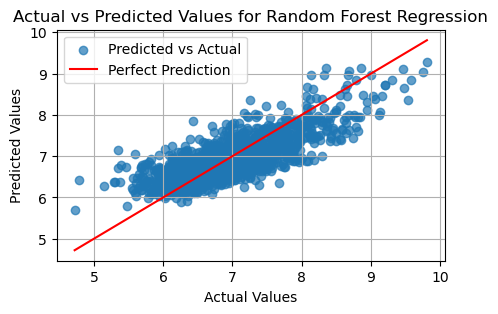

Actual vs Predicted values for Random Forest Regression:
       Actual  Predicted
3091    7.39   7.315236
1535    6.58   6.348649
6338    7.54   7.741380
177     6.42   6.918048
230     7.33   7.584548
...      ...        ...
5542    7.28   6.738549
4950    7.26   6.623985
1886    7.60   7.522586
911     7.50   6.828179
6525    6.16   6.749613

[1442 rows x 2 columns]
Training Gradient Boosting Regression...


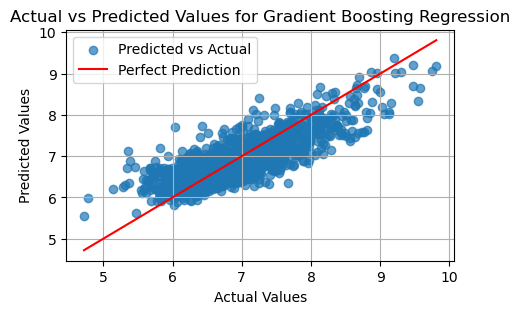

Actual vs Predicted values for Gradient Boosting Regression:
       Actual  Predicted
3091    7.39   7.388088
1535    6.58   6.421889
6338    7.54   7.818140
177     6.42   6.951126
230     7.33   7.247894
...      ...        ...
5542    7.28   6.818263
4950    7.26   6.581279
1886    7.60   7.396276
911     7.50   6.749077
6525    6.16   6.679282

[1442 rows x 2 columns]
Training SVR Regression...


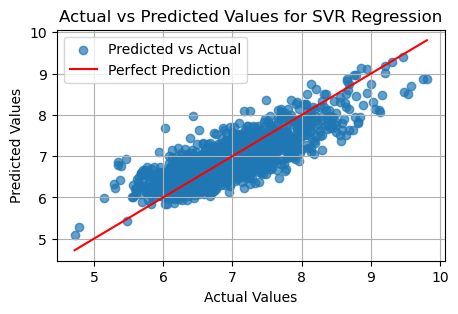

Actual vs Predicted values for SVR Regression:
       Actual  Predicted
3091    7.39   7.493965
1535    6.58   6.464404
6338    7.54   7.734754
177     6.42   6.876700
230     7.33   7.301329
...      ...        ...
5542    7.28   6.973008
4950    7.26   6.778141
1886    7.60   7.452802
911     7.50   6.850139
6525    6.16   6.703094

[1442 rows x 2 columns]
Training Neural Network Regression...


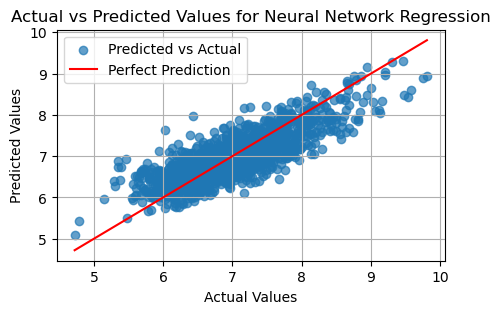

Actual vs Predicted values for Neural Network Regression:
       Actual  Predicted
3091    7.39   7.469612
1535    6.58   6.481238
6338    7.54   7.837679
177     6.42   6.896811
230     7.33   7.366357
...      ...        ...
5542    7.28   6.995827
4950    7.26   6.706497
1886    7.60   7.509953
911     7.50   6.919154
6525    6.16   6.711837

[1442 rows x 2 columns]
                          Model       MSE       MAE      RMSE        R2  \
0            XGBoost Regression  0.183617  0.335135  0.428506  0.644450   
1           AdaBoost Regression  0.227957  0.373386  0.477449  0.558591   
2                KNN Regression  0.376210  0.470639  0.613359  0.271521   
3      Decision Tree Regression  0.272791  0.406517  0.522294  0.471776   
4      Random Forest Regression  0.199133  0.350599  0.446244  0.614405   
5  Gradient Boosting Regression  0.184131  0.336035  0.429105  0.643455   
6                SVR Regression  0.174452  0.329833  0.417674  0.662197   
7     Neural Network Regress

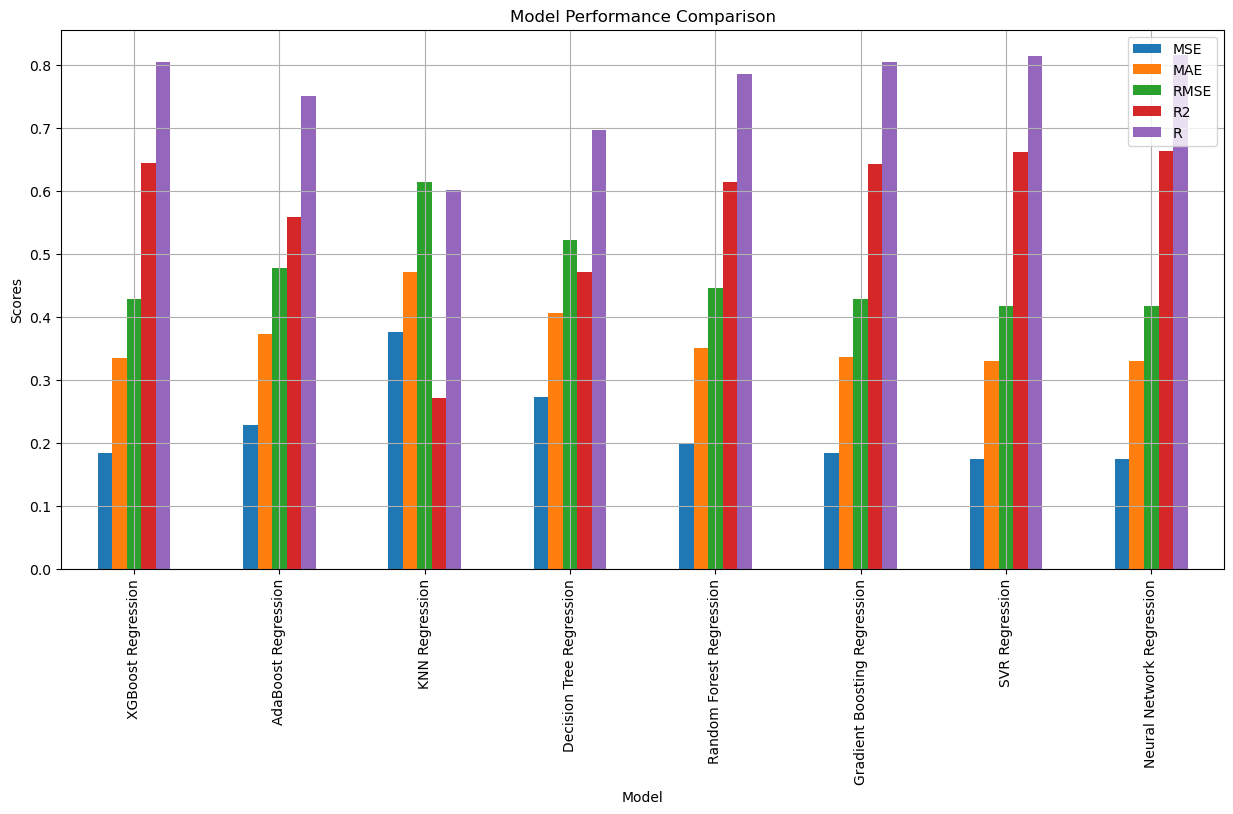

In [25]:
#using the best parameters on train_val and evaluating on tests set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and manually set the parameters
random_state = 42

models = [
    (XGBRegressor(random_state=random_state, n_estimators=200, learning_rate=0.1, max_depth=3), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state, n_estimators=200, learning_rate=0.2), 'AdaBoost Regression'),
    (KNeighborsRegressor(n_neighbors=7, weights='distance', algorithm='ball_tree'), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state, max_depth=10, min_samples_split=20), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state, n_estimators=200, max_depth=None, min_samples_split=10), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state, n_estimators=200, learning_rate=0.1, max_depth=3), 'Gradient Boosting Regression'),
    (SVR(C=10, kernel='linear', gamma='scale'), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000, hidden_layer_sizes=(100,), activation='tanh', solver='adam'), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    print(f"Training {name}...")
    
    # Retrain the model on the entire train_val set
    model.fit(X_train_val, y_train_val)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_test, y_pred)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2,'R':r})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print actual and predicted values
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"Actual vs Predicted values for {name}:\n", results)

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

# Plot metrics comparison
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(15, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [25]:
# Save each DataFrame as a CSV file
X.to_csv('midfielders_rating_X.csv', index=False)
y.to_csv('midfielders_rating_y.csv', index=False)


print("DataFrames have been saved as CSV files.")

DataFrames have been saved as CSV files.
